In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("../Kaggle_Housing_Prices/train.csv")
pd.options.display.max_columns=None

data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
clean_df=data.copy()

In [4]:
## drop Id.  DF has index
clean_df.drop("Id", axis=1, inplace=True)

In [ ]:
#clean_df[['MSSubClass', 'SalePrice']].groupby('MSSubClass').median().sort_values(by='SalePrice', ascending=True)

## Fill null values

In [5]:
## Many houses do not have basements.  fill basement NaN's with 'none'
clean_df['BsmtQual'].fillna('none', inplace=True)
clean_df['BsmtCond'].fillna('none', inplace=True)
clean_df['BsmtExposure'].fillna('none', inplace=True)
clean_df['BsmtFinType1'].fillna('none', inplace=True)
clean_df['BsmtFinType2'].fillna('none', inplace=True)
clean_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
## fill Alley NaN's with 'none'
clean_df['Alley'].fillna('none', inplace=True)

## fil Lot Frontage with Median
median=clean_df['LotFrontage'].median()
clean_df['LotFrontage'].fillna(median, inplace=True)

In [7]:
## drop 1 row with NaN for Electrical
clean_df.dropna(axis=0, subset=['Electrical'], inplace=True)

In [8]:
## fil fireplaceQual NaN's with 'none'
clean_df['FireplaceQu'].fillna('none', inplace=True)

In [9]:
## take care of garage NaN's

clean_df['GarageType'].fillna('none', inplace=True)
clean_df['GarageYrBlt'].fillna(0, inplace=True)
clean_df['GarageFinish'].fillna('none', inplace=True)
clean_df['GarageQual'].fillna('none', inplace=True)
clean_df['GarageCond'].fillna('none', inplace=True)

In [10]:
## Pool NaN's
clean_df['PoolQC'].fillna('none', inplace=True)
## Fence
clean_df['Fence'].fillna('none', inplace=True)
## MiscFeature
clean_df['MiscFeature'].fillna('none', inplace=True)

In [11]:
clean_df['MasVnrType'].fillna('none', inplace=True)
clean_df['MasVnrArea'].fillna(0, inplace=True)

In [12]:
### No more NaN's in dataset
clean_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

## Quality can be numerical

In [13]:
clean_df.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0}, inplace=True)
clean_df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,ALQ,978,Unf,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [14]:
## Central Air
ac=[]

for each in clean_df['CentralAir']:
    if each == 'N':
        v=0
    elif each == 'Y':
        v=1
    ac.append(v)
    
clean_df['CentralAC']=ac
clean_df.drop('CentralAir', axis=1, inplace=True)

In [15]:
## Functional
fnc=[]

for each in clean_df['Functional']:
    if each=='Typ':
        q=8
    elif each =='Min1':
        q=7
    elif each =='Min2':
        q=6
    elif each =='Mod':
        q=5
    elif each =='Maj1':
        q=4
    elif each =='Maj2':
        q=3
    elif each == 'Sev':
        q=2
    elif each == 'Sal':
        q=1
    fnc.append(q)
    
clean_df['Functionality']=fnc
##clean_df.drop('Functional', axis=1, inplace=True)
clean_df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAC,Functionality
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,0,150,856,GasA,5,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,0,0,0,2,2008,WD,Normal,208500,1,8
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,ALQ,978,Unf,0,284,1262,GasA,5,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,0,0,0,5,2007,WD,Normal,181500,1,8


In [ ]:
### Add a column using Median Neighborhood value

# medsaledf=data.groupby('Neighborhood').median()
# medsaledf['SalePrice'].sort_values()

In [16]:
meds=[]

for each in clean_df['Neighborhood']:
    if each == 'MeadowV':
        m=88000
    elif each == 'IDOTRR':
        m=103000
    elif each == 'BrDale':
        m=106000
    elif each == 'OldTown':
        m=119000
    elif each == 'Edwards':
        m=121750
    elif each == 'BrkSide':
        m=124300
    elif each == 'Sawyer':
        m=135000
    elif each == 'Blueste':
        m=137500
    elif each == 'SWISU':
        m=139500
    elif each == 'NAmes':
        m=140000
    elif each == 'NPkVill':
        m=146000
    elif each == 'Mitchel':
        m=153500
    elif each == 'SawyerW':
        m=179900
    elif each == 'Gilbert':
        m=181000
    elif each == 'NWAmes':
        m=182900
    elif each == 'Blmngtn':
        m=191000
    elif each == 'CollgCr':
        m=197200
    elif each == 'ClearCr':
        m=200250
    elif each == 'Crawfor':
        m=200624
    elif each == 'Veenker':
        m=218000
    elif each == 'Somerst':
        m=225500
    elif each == 'Timber':
        m=228475
    elif each == 'StoneBr':
        m=278000
    elif each == 'NoRidge':
        m=301500
    elif each == 'NridgHt':
        m=315000
        
    meds.append(m)
    
clean_df['NeighborhoodMedValue']=meds
#clean_df.drop('Neighborhood', axis=1, inplace=True)

In [17]:
## Add a column using Zoning median Price

zmed=[]

for each in clean_df['MSZoning']:
    if each == 'C(all)':
        z=74700
    elif each == 'RM':
        z=120500
    elif each == 'RH':
        z=136500
    elif each == 'RL':
        z=174000
    elif each == 'FV':
        z=205950
    zmed.append(z)
    
clean_df['ZoningMedian']=zmed

In [18]:
## Add a column changing Electrical to representative of mean saleprice per category
Elec=[]

for each in clean_df['Electrical']:
    if each == 'Mix':
        E=.67
    elif each =='FuseP':
        E=.97
    elif each == 'FuseF':
        E=1.08
    elif each == 'FuseA':
        E=1.22
    elif each =='SBrkr':
        E=1.87
    Elec.append(E)
    
clean_df["ElectricalCat"]=Elec

In [19]:
## Paved Drive based on Median sale price
paved=[]
for each in clean_df['PavedDrive']:
    if each == 'N':
        p=1.11
    elif each == 'P':
        p=1.32
    elif each == 'Y':
        p=1.69
    paved.append(p)

clean_df['Driveway']=paved


In [20]:
## Add a column TotalSquareFeet
clean_df['TotalSF']= clean_df['1stFlrSF']+clean_df['2ndFlrSF']
## total sq ft plus basement
clean_df['TotSFInclBsmt']= clean_df['TotalSF']+clean_df['TotalBsmtSF']
## Total Full Bath
clean_df['TotFullBath']=clean_df['BsmtFullBath']+clean_df['FullBath']
## Total Half Bath
clean_df['TotHalfBath']=clean_df['BsmtHalfBath']+clean_df['HalfBath']
## Total Baths with half baths represented as 0.1
clean_df['TotalBaths']=clean_df['TotFullBath']+(clean_df['TotHalfBath']*0.1)

In [21]:
### Add a column using  Median TotSFInclBsmt per NeighborhoodMedValue

medSF=clean_df.groupby('NeighborhoodMedValue').median()
medSF['TotalSF'].sort_values()

NeighborhoodMedValue
88000     1092.0
135000    1106.0
103000    1111.0
106000    1155.0
140000    1196.0
121750    1200.0
153500    1204.0
124300    1210.5
146000    1322.0
119000    1368.0
137500    1392.5
218000    1437.0
197200    1500.0
191000    1500.0
225500    1564.5
181000    1593.0
179900    1603.0
182900    1664.0
139500    1691.0
228475    1692.0
200624    1717.0
200250    1738.0
278000    1742.0
315000    1850.0
301500    2418.0
Name: TotalSF, dtype: float64

In [22]:
medsf=[]

for each in clean_df['NeighborhoodMedValue']:
    if each == 88000:
        m=1092
    elif each == 103000:
        m=1111
    elif each == 106000:
        m=1155
    elif each == 119000:
        m=1368
    elif each == 121750:
        m=1200
    elif each == 124300:
        m=1210
    elif each == 135000:
        m=1106
    elif each == 137500:
        m=1392
    elif each == 139500:
        m=1691
    elif each == 140000:
        m=1196
    elif each == 146000:
        m=1322
    elif each == 153500:
        m=1204
    elif each == 179900:
        m=1603
    elif each == 181000:
        m=1593
    elif each == 182900:
        m=1664
    elif each == 191000:
        m=1500
    elif each == 197200:
        m=1500
    elif each == 200250:
        m=1738
    elif each == 200624:
        m=1717
    elif each == 218000:
        m=1437
    elif each == 225500:
        m=1564
    elif each == 228475:
        m=1692
    elif each == 278000:
        m=1742
    elif each == 301500:
        m=2418
    elif each == 315000:
        m=1850
        
    medsf.append(m)
    
clean_df['MedianSFByNeighborhood']=medsf


In [23]:
## Add column PricePerSF

clean_df['PricePerSF']=(clean_df['SalePrice']/clean_df['TotSFInclBsmt'])

In [24]:
## Add column MedianPricePerSF by Neighborhood.  Price per SF will not be available in test data
clean_df[['PricePerSF', 'Neighborhood']].groupby('Neighborhood').median().sort_values(by='PricePerSF', ascending=True)

medP=[]
AvgP=[]

for each in clean_df['Neighborhood']:
    if each == 'SWISU':
        m=55.23
        a=58.10
    elif each =='IDOTRR':
        m=55.43
        a=53.82
    elif each =='OldTown':
        m=57.49
        a=57.58
    elif each =='Edwards':
        m=59.03
        a=61.59
    elif each =='BrDale':
        m=59.24
        a=61.00
    elif each =='MeadowV':
        m=59.92
        a=59.22
    elif each =='NAmes':
        m=63.95
        a=64.91
    elif each =='BrkSide':
        m=64.39
        a=65.13
    elif each =='NPkVill':
        m=64.68
        a=65.39
    elif each =='Sawyer':
        m=65.20
        a=64.45
    elif each =='NWAmes':
        m=66.62
        a=66.39
    elif each =='Mitchel':
        m=67.28
        a=66.78
    elif each =='Blueste':
        m=67.87
        a=67.87
    elif each =='Blmngton':
        m=68.56
        a=70.71
    elif each =='ClearCr':
        m=69.54
        a=71.81
    elif each =='SawyerW':
        m=71.13
        a=70.96
    elif each =='CollgCr':
        m=74.80
        a=75.21
    elif each =='Crawfor':
        m=76.32
        a=74.95
    elif each =='Gilbert':
        m=76.62
        a=77.38
    elif each =='Timber':
        m=78.26
        a=77.44
    elif each =='Veenker':
        m=78.47
        a=82.09
    elif each=='NoRidge':
        m=80.35
        a=82.67
    elif each =='Somerst':
        m=83.21
        a=82.65
    elif each =='StoneBr':
        m=87.64
        a=89.28
    elif each =='NridgHt':
        m=88.89
        a=88.61
    medP.append(m)
    AvgP.append(a)
    
clean_df['MedPPSFNeigh']=medP
clean_df['AvgPPSFNeigh']=AvgP

In [ ]:
## This cell completed in cell above.  This cell used for reference
## Add column AvgPricePer SF.  Price per SF will not be available in test data
##clean_df[['PricePerSF', 'Neighborhood']].groupby('Neighborhood').mean().sort_values(by='PricePerSF', ascending=True)

In [25]:
clean_df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAC,Functionality,NeighborhoodMedValue,ZoningMedian,ElectricalCat,Driveway,TotalSF,TotSFInclBsmt,TotFullBath,TotHalfBath,TotalBaths,MedianSFByNeighborhood,PricePerSF,MedPPSFNeigh,AvgPPSFNeigh
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,0,150,856,GasA,5,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,0,0,0,2,2008,WD,Normal,208500,1,8,197200,174000,1.87,1.69,1710,2566,3,1,3.1,1500,81.254871,74.8,75.21


In [ ]:
#clean_df[['ElectricalCat', 'SalePrice']].groupby('ElectricalCat').mean().sort_values(by='SalePrice', ascending=True)
#clean_df['MiscVal'].value_counts()
#clean_df.loc[clean_df['LotFrontage']>150]

In [27]:
corr_matrix=clean_df.corr()
corrDF=clean_df
#corrDF=clean_df.loc[clean_df['TotalBsmtSF']<2500]
corrDF[[ 'MedPPSFNeigh', 'AvgPPSFNeigh', 'SalePrice']].corr()

,MedPPSFNeigh,AvgPPSFNeigh,SalePrice
MedPPSFNeigh,1.000000,0.992760,0.668024
AvgPPSFNeigh,0.992760,1.000000,0.677177
SalePrice,0.668024,0.677177,1.000000


In [28]:
clean_df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAC,Functionality,NeighborhoodMedValue,ZoningMedian,ElectricalCat,Driveway,TotalSF,TotSFInclBsmt,TotFullBath,TotHalfBath,TotalBaths,MedianSFByNeighborhood,PricePerSF,MedPPSFNeigh,AvgPPSFNeigh
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,0,150,856,GasA,5,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,0,0,0,2,2008,WD,Normal,208500,1,8,197200,174000,1.87,1.69,1710,2566,3,1,3.1,1500,81.254871,74.8,75.21


## Find Outliers

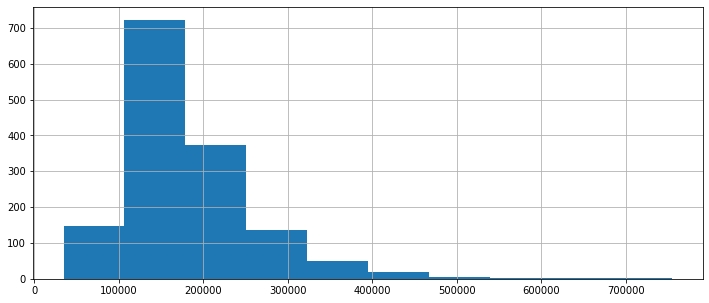

In [32]:
clean_df['SalePrice'].hist(figsize=(12,5))

In [31]:
newdf=clean_df.copy()

In [33]:
newdf=newdf.loc[newdf['SalePrice']<500000]

In [34]:
newdf.drop([523, 1298], inplace=True)
newdf.drop('Street', axis=1, inplace=True)
newdf.drop(['BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)
newdf.drop('3SsnPorch', axis=1, inplace=True)
newdf.drop('ScreenPorch', axis=1, inplace=True)
newdf.drop('1stFlrSF', axis=1, inplace=True)
newdf.drop('2ndFlrSF', axis=1, inplace=True)
newdf.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotFullBath', 'TotHalfBath'], axis=1, inplace=True)

In [35]:
## LotArea max at 50000

newdf.loc[newdf['LotArea']>50000, 'LotArea']=np.nan
newdf.fillna(50000, inplace=True)

newdf['LotArea'].max()


50000.0

In [36]:
## MasVnrArea  set max to 800

temp=newdf.loc[newdf['MasVnrArea']>800]
temp[['MasVnrArea', 'SalePrice']]

#median=newdf.loc[newdf['MasVnrArea']<800, 'MasVnrArea'].median()
newdf.loc[newdf['MasVnrArea']>800, 'MasVnrArea']=np.nan
newdf.fillna(800, inplace=True)

newdf.loc[[115]]


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAC,Functionality,NeighborhoodMedValue,ZoningMedian,ElectricalCat,Driveway,TotalSF,TotSFInclBsmt,TotalBaths,MedianSFByNeighborhood,PricePerSF,MedPPSFNeigh,AvgPPSFNeigh
115,160,FV,34.0,3230.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,1999,1999,Gable,CompShg,MetalSd,MetalSd,BrkFace,800.0,3,3,PConc,4,3,No,GLQ,419,Unf,729,GasA,4,SBrkr,0,1458,2,1,3,5,Typ,1,2,Detchd,1999.0,Unf,2,440,3,3,Y,0,32,0,0,0,0,0,0,6,2007,WD,Normal,176000,1,8,225500,205950,1.87,1.69,1458,2187,2.1,1564,80.475537,83.21,82.65


In [37]:
## TotalBsmtSF set max to 2500
newdf.loc[newdf['TotalBsmtSF']>2500, 'TotalBsmtSF']=np.nan
newdf.fillna(2500, inplace=True)
newdf['TotalBsmtSF'].max()

2500.0

In [38]:
## LotFrontage set max to 150
newdf.loc[newdf['LotFrontage']>150, 'LotFrontage']=np.nan
newdf.fillna(150, inplace=True)
newdf['LotFrontage'].max()

150.0

In [39]:
## TotalBaths max to 4.2
newdf.loc[newdf['TotalBaths']>4.2, 'TotalBaths']=np.nan
newdf.fillna(4.2, inplace=True)
newdf['TotalBaths'].max()

4.2

In [40]:
## Set BedroomsAbvGr max to 4
newdf.loc[newdf['BedroomAbvGr']>4, 'BedroomAbvGr']=np.nan
newdf.fillna(4, inplace=True)
newdf['BedroomAbvGr'].max()

4.0

In [41]:
## Set GarageCars max to 3
newdf.loc[newdf['GarageCars']>3, 'GarageCars']=np.nan
newdf.fillna(3, inplace=True)
newdf['GarageCars'].max()

3.0

In [42]:
## Limit GarageArea to 1000
newdf.loc[newdf['GarageArea']>1000, 'GarageArea']=np.nan
newdf.fillna(1000, inplace=True)
newdf['GarageArea'].max()

1000.0

In [43]:
## Limit WoddDeckSF to 500
newdf.loc[newdf['WoodDeckSF']>500, 'WoodDeckSF']=np.nan
newdf.fillna(500, inplace=True)
newdf['WoodDeckSF'].max()

500.0

In [44]:
## Limit OpenPorchSF to 300
newdf.loc[newdf['OpenPorchSF']>300, 'OpenPorchSF']=np.nan
newdf.fillna(300, inplace=True)
newdf['OpenPorchSF'].max()

300.0

In [45]:
## Limit EnclosedPorch to 75
newdf.loc[newdf['EnclosedPorch']>75, 'EnclosedPorch']=np.nan
newdf.fillna(75, inplace=True)
newdf['EnclosedPorch'].max()

75.0

In [46]:
## Set max MiscVal to 100
newdf.loc[newdf['MiscVal']>100, 'MiscVal']=np.nan
newdf.fillna(100, inplace=True)
newdf['MiscVal'].max()

100.0

In [47]:
newdf.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAC,Functionality,NeighborhoodMedValue,ZoningMedian,ElectricalCat,Driveway,TotalSF,TotSFInclBsmt,TotalBaths,MedianSFByNeighborhood,PricePerSF,MedPPSFNeigh,AvgPPSFNeigh
0,60,RL,65.0,8450.0,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,856.0,GasA,5,SBrkr,0,1710,3.0,1,4,8,Typ,0,0,Attchd,2003.0,RFn,2.0,548.0,3,3,Y,0.0,61.0,0.0,0,0,0,0,0.0,2,2008,WD,Normal,208500,1,8,197200,174000,1.87,1.69,1710,2566,3.1,1500,81.254871,74.8,75.21


In [ ]:
#plt.scatter(newdf['SalePrice'], newdf['GarageArea'])

In [48]:
newdf.drop([661,848], inplace=True)
# TotSFInclBsmt is better correlated than any other sq ft
#newdf.drop(['1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)
newdf.drop('LowQualFinSF', axis=1, inplace=True)

In [49]:
corr_matrix=newdf.corr()
newcorrDF=newdf
#newcorrDF=newdf.loc[clean_df['TotalBsmtSF']<2500]
newcorrDF[['LotArea', 'SalePrice']].corr()

,LotArea,SalePrice
LotArea,1.000000,0.349672
SalePrice,0.349672,1.000000


## Import Libraries

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

## Use All values

In [52]:
binarydf=pd.get_dummies(newdf)

AX=binarydf.drop(['SalePrice', 'PricePerSF'], axis=1)
Ay=binarydf['SalePrice']

stdscaler=StandardScaler()
AX_stdScaled=stdscaler.fit_transform(AX)

AX_train, AX_test, Ay_train, Ay_test=train_test_split(AX_stdScaled, Ay, train_size=.8, random_state=42)

## Adjust R2 for all values

In [53]:
corr_matrixA=binarydf.corr()
corr_listA=corr_matrixA['SalePrice']
corr_dfA=pd.DataFrame(corr_listA)
corr_dfA.reset_index()

## Turn into a list to loop through
drop_listA=corr_dfA.loc[(corr_dfA['SalePrice']<0.3) & (corr_dfA['SalePrice']> -0.3)]
        
drop_listA.reset_index(inplace=True)

colsA=drop_listA['index'].tolist()

AllReduced=binarydf.copy()

for each in colsA:
    AllReduced.drop(each, axis=1, inplace=True)

In [54]:
ARX=AllReduced.drop('SalePrice', axis=1)
ARy=AllReduced['SalePrice']

stdscaler=StandardScaler()
ARX_stdScaled=stdscaler.fit_transform(ARX)

ARX_train, ARX_test, ARy_train, ARy_test=train_test_split(ARX_stdScaled, ARy, train_size=.8, random_state=42)

##  Integer Only
### Create a DF with no string values for experimental purposes

In [55]:
integerOnlyDF=newdf.select_dtypes(include='number')
integerOnlyDF.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,TotalBsmtSF,HeatingQC,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,CentralAC,Functionality,NeighborhoodMedValue,ZoningMedian,ElectricalCat,Driveway,TotalSF,TotSFInclBsmt,TotalBaths,MedianSFByNeighborhood,PricePerSF,MedPPSFNeigh,AvgPPSFNeigh
0,60,65.0,8450.0,7,5,2003,2003,196.0,4,3,4,3,706,856.0,5,1710,3.0,1,4,8,0,0,2003.0,2.0,548.0,3,3,0.0,61.0,0.0,0,0,0.0,2,2008,208500,1,8,197200,174000,1.87,1.69,1710,2566,3.1,1500,81.254871,74.80,75.21
1,20,80.0,9600.0,6,8,1976,1976,0.0,3,3,4,3,978,1262.0,5,1262,3.0,1,3,6,1,3,1976.0,2.0,460.0,3,3,298.0,0.0,0.0,0,0,0.0,5,2007,181500,1,8,218000,174000,1.87,1.69,1262,2524,2.1,1437,71.909667,78.47,82.09


In [56]:
## Standard Scaler and Train_Test_Split

XIO= integerOnlyDF.drop('SalePrice', axis=1)
yIO= integerOnlyDF['SalePrice']

stdscaler=StandardScaler()
XIO_stdScaled=stdscaler.fit_transform(XIO)

XIO_train, XIO_test, yIO_train, yIO_test=train_test_split(XIO_stdScaled, yIO, train_size=.8, random_state=42)

#### Correlation Matrix

In [57]:
corr_matrix3=integerOnlyDF.corr()
#corr_matrix3['SalePrice'].sort_values(ascending=False)

In [58]:
corr_list3=corr_matrix3['SalePrice'].sort_values(ascending=False)
corr_df3=pd.DataFrame(corr_list3)
corr_df3.reset_index().head(1)

,index,SalePrice
0,SalePrice,1.0


## Adjust X values based on R2

In [59]:
## Turn into a list to loop through  0.08
drop_list3=corr_df3.loc[(corr_df3['SalePrice']<0.01) & (corr_df3['SalePrice']> -0.01)]
        
drop_list3.reset_index(inplace=True)
drop_list3['index']

cols3=drop_list3['index'].tolist()

intOnlyReduced=integerOnlyDF.copy()

for each in cols3:
    intOnlyReduced.drop(each, axis=1, inplace=True)

In [60]:
## Standard Scaler & Train_test_split
## Drop PricePerSF because it will not be available in test data

XR= intOnlyReduced.drop(['SalePrice', 'PricePerSF'], axis=1)
yR= intOnlyReduced['SalePrice']

stdscaler=StandardScaler()
XR_stdScaled=stdscaler.fit_transform(XR)

XR_train, XR_test, yR_train, yR_test=train_test_split(XR_stdScaled, yR, train_size=.8, random_state=22)


## Random Forest

In [61]:
forest2=RandomForestRegressor()

forest2.fit(XR_train, yR_train)
forest2.score(XR_train, yR_train)

0.9850934209193027

In [62]:
forest2.score(XR_test, yR_test)

0.8962119018306595

In [63]:
forest2_predictions=forest2.predict(XR_test)

forest2_mse= mean_squared_error(yR_test, forest2_predictions)
forest2_rmse=np.sqrt(forest2_mse)
forest2_rmse

# XR 0.01=21,604
# XR 0.3=22,383

22405.7467101043

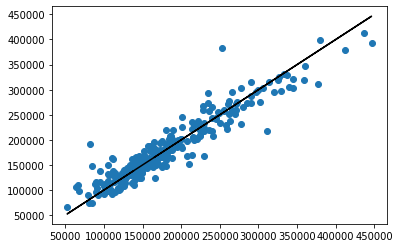

In [64]:
plt.scatter(yR_test, forest2_predictions)
plt.plot(yR_test, yR_test, 'k-')

## Split data into two groups. one high priced neighborhoods. one regular priced neighborhoods

In [242]:
lowerDF=intOnlyReduced.loc[intOnlyReduced['SalePrice']<=350000]
upperDF=intOnlyReduced.loc[intOnlyReduced['SalePrice']>350000]
len(upperDF)

44

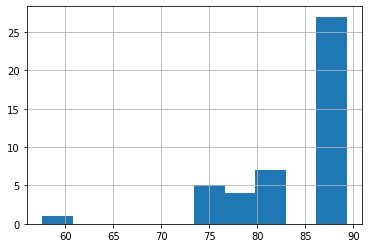

In [85]:
upperDF['AvgPPSFNeigh'].hist()
#intOnlyReduced['AvgPPSFNeigh'].value_counts()

In [243]:
## Standard Scaler & Train_test_split
## Drop PricePerSF because it will not be available in test data

XL= lowerDF.drop(['SalePrice', 'PricePerSF'], axis=1)
yL= lowerDF['SalePrice']

stdscaler=StandardScaler()
XL_stdScaled=stdscaler.fit_transform(XL)

XL_train, XL_test, yL_train, yL_test=train_test_split(XL_stdScaled, yL, train_size=.8, random_state=22)


In [244]:
forestL=RandomForestRegressor()

forestL.fit(XR_train, yR_train)
forestL.score(XR_train, yR_train)

0.9846848222867

In [245]:
forestL.score(XL_test, yL_test)

0.9395762230263629

In [246]:
forestL_predictions=forestL.predict(XL_test)

forestL_mse= mean_squared_error(yL_test, forestL_predictions)
forestL_rmse=np.sqrt(forestL_mse)
forestL_rmse

15319.717298977754

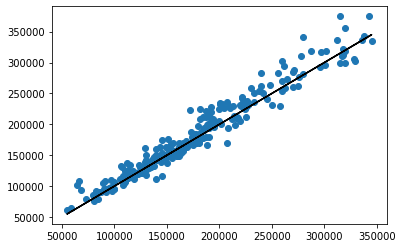

In [247]:
plt.scatter(yL_test, forestL_predictions)
plt.plot(yL_test, yL_test, 'k-')

In [248]:
## UpperDF
XU= upperDF.drop(['SalePrice', 'PricePerSF'], axis=1)
yU= upperDF['SalePrice']

stdscaler=StandardScaler()
XU_stdScaled=stdscaler.fit_transform(XU)

XU_train, XU_test, yU_train, yU_test=train_test_split(XU_stdScaled, yU, train_size=.8, random_state=22)


In [249]:
forestL.score(XU_test, yU_test)

-48.71950272814423

## Split data into two groups based on price per square foot and square footage

In [205]:
regDF=intOnlyReduced.loc[(intOnlyReduced['TotSFInclBsmt']<4500) & (intOnlyReduced['SalePrice']<350000)]
upDF=intOnlyReduced.loc[intOnlyReduced['AvgPPSFNeigh']>85]
len(regDF)

1393

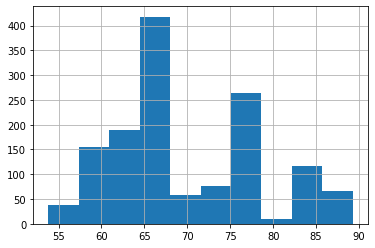

In [206]:
regDF['AvgPPSFNeigh'].hist()

In [211]:
## Standard Scaler & Train_test_split
## Drop PricePerSF because it will not be available in test data

XReg= upperDF.drop(['SalePrice', 'PricePerSF'], axis=1)
yReg= upperDF['SalePrice']

stdscaler=StandardScaler()
XReg_stdScaled=stdscaler.fit_transform(XReg)

XReg_train, XReg_test, yReg_train, yReg_test=train_test_split(XReg_stdScaled, yReg, train_size=.8, random_state=22)


In [212]:
forestReg=RandomForestRegressor()

forestReg.fit(XReg_train, yReg_train)
forestReg.score(XReg_train, yReg_train)

0.8619797782497469

In [213]:
forestReg.score(XReg_test, yReg_test)

0.3582737020718486

In [214]:
forestReg_predictions=forestReg.predict(XReg_test)

forestReg_mse= mean_squared_error(yReg_test, forestReg_predictions)
forestReg_rmse=np.sqrt(forestReg_mse)
forestReg_rmse

25025.36530959139

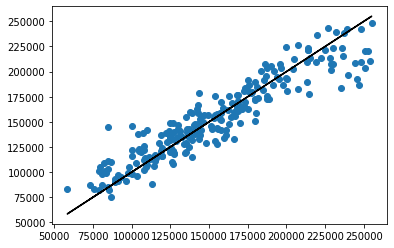

In [204]:
plt.scatter(yReg_test, forestReg_predictions)
plt.plot(yReg_test, yReg_test, 'k-')

In [ ]:
rf=RandomForestRegressor()

grid= {
    'n_estimators': [1000,5000, 8000],
    'max_features': ['sqrt'],
    #'max_depth': [10, 25, 50, 100],
    'bootstrap': [False]
}

rf_random=RandomizedSearchCV(rf, grid, n_iter=1000, cv=3, random_state=42)

rf_random.fit(XR_train, yR_train)

In [ ]:
rf_random.best_params_

In [ ]:
rf_random.score(XR_train, yR_train)

In [ ]:
rf_random.score(XR_test, yR_test)

In [ ]:
rf_predictions=rf_random.predict(XR_test)

rf_mse= mean_squared_error(yR_test, rf_predictions)
rf_rmse=np.sqrt(rf_mse)
rf_rmse

In [ ]:
plt.scatter(yR_test, rf_predictions)
plt.plot(yR_test, yR_test, 'k-')

## Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(XR_train)

Enet=ElasticNet(alpha=0.5, l1_ratio=.4, max_iter=10000, tol=1e-5)
Enet.fit(X_poly, yR_train)
Enet.score(X_poly, yR_train)

In [ ]:
X_polytest=poly_features.fit_transform(XR_test)

Enet.score(X_polytest, yR_test)

In [ ]:
EN_predictions=Enet.predict(X_polytest)

EN_mse= mean_squared_error(yR_test, EN_predictions)
EN_rmse=np.sqrt(EN_mse)
EN_rmse

# XR 0.01= 13,203
# XR 0.1 = 13,405
# X_poly 0.08= 22,157
# X_poly 0.33= 22,260

###  Elastic Randomized search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
Elastic=ElasticNet()

grid= {
    'max_iter': [1000000, 1500000],
    'alpha': [0.1, 1, 0.5],
    'l1_ratio': [0.01, 0.1, 1, 2],
    'normalize': [False],
    'tol': [0.0001, 0.00001, 0.000001]
}

Elastic_random=RandomizedSearchCV(Elastic, grid, scoring='r2', cv=5, random_state=42)

Elastic_random.fit(X_poly, yR_train)


In [ ]:
Elastic_random.best_params_

In [ ]:
Elastic_random.score(X_poly, yR_train)

In [ ]:
Elastic_random.score(X_polytest, yR_test)

In [ ]:
E_predictions=Elastic_random.predict(X_polytest)

E_mse= mean_squared_error(yR_test, E_predictions)
E_rmse=np.sqrt(E_mse)
E_rmse

## 0.05=22,782
## XR 0.1= 21,554

In [ ]:
plt.scatter(yR_test, E_predictions)
plt.plot(yR_test, yR_test, 'k-')

## Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
ET=ExtraTreesRegressor()
ET.fit(XR_train, yR_train)
ET.score(XR_train, yR_train)

In [ ]:
ET.score(XR_test, yR_test)

In [ ]:
ET_predictions=ET.predict(XR_test)

ET_mse= mean_squared_error(yR_test, ET_predictions)
ET_rmse=np.sqrt(ET_mse)
ET_rmse

## XR 0.1= 22,302
## X_poly 0.1= 22,711
## X_poly 0.3= 22,548

In [ ]:
plt.scatter(yR_test, ET_predictions)
plt.plot(yR_test, yR_test, 'k-')

## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt=GradientBoostingRegressor(max_depth=20, n_estimators=8000, max_features='sqrt', learning_rate=0.001)
gbrt.fit(XR_train, yR_train)
gbrt.score(XR_train, yR_train)

In [ ]:
gbrt.score(XR_test, yR_test)

In [ ]:
gbrt_predictions=gbrt.predict(XR_test)

gbrt_mse= mean_squared_error(yR_test, gbrt_predictions)
gbrt_rmse=np.sqrt(gbrt_mse)
gbrt_rmse

## XR 0.01=22,186
## XR 0.3= 22,450
## X_poly 0.3=23,038

In [ ]:
plt.scatter(yR_test, gbrt_predictions)
plt.plot(yR_test, yR_test, 'k-')

# Begin cleaning Test Data

In [ ]:
test_data=pd.read_csv("../Kaggle_Housing_Prices/test.csv")
pd.options.display.max_columns=None

test_data.head(2)

In [ ]:
test_df=test_data.copy()

In [ ]:
## Remember to Remove and Save Id column before running test data

In [ ]:
#  MSSubClass could be made integers based on median SalePrice in that class.  

SubClassNumber=[]

for each in test_df["MSSubClass"]:
    if each == 20:
        cat=11
    elif each == 30:
        cat=2
    elif each == 40:
        cat=8
    elif each == 45:
        cat=3
    elif each == 50:
        cat=5
    elif each == 60:
        cat=15
    elif each == 70:
        cat=10
    elif each == 75:
        cat=12
    elif each == 80:
        cat=13
    elif each == 85:
        cat=7
    elif each == 90:
        cat=6
    elif each == 120:
        cat=14
    elif each == 150:
        cat=0
    elif each == 160:
        cat=9
    elif each == 180:
        cat=1
    elif each == 190:
        cat=4
        
    SubClassNumber.append(cat)

test_df["SubClassInt"]=SubClassNumber
#clean_df.drop("MSSubClass", axis=1, inplace=True)
test_df.head(2)

## Fill null values

In [ ]:
## Many houses do not have basements.  fill basement NaN's with 'none'
test_df['BsmtQual'].fillna('none', inplace=True)
test_df['BsmtCond'].fillna('none', inplace=True)
test_df['BsmtExposure'].fillna('none', inplace=True)
test_df['BsmtFinType1'].fillna('none', inplace=True)
test_df['BsmtFinType2'].fillna('none', inplace=True)
test_df.head(3)

In [ ]:
## fill Alley NaN's with 'none'
test_df['Alley'].fillna('none', inplace=True)

## fil Lot Frontage with Median
median=clean_df['LotFrontage'].median()
test_df['LotFrontage'].fillna(median, inplace=True)

In [ ]:
## check NaN for Electrical
test_df['Electrical'].loc[test_df['Electrical'].isna()==True]

In [ ]:
## fil fireplaceQual NaN's with 'none'
test_df['FireplaceQu'].fillna('none', inplace=True)

In [ ]:
## take care of garage NaN's

test_df['GarageType'].fillna('none', inplace=True)
test_df['GarageYrBlt'].fillna(0, inplace=True)
test_df['GarageFinish'].fillna('none', inplace=True)
test_df['GarageQual'].fillna('none', inplace=True)
test_df['GarageCond'].fillna('none', inplace=True)

In [ ]:
## Pool NaN's
test_df['PoolQC'].fillna('none', inplace=True)
## Fence
test_df['Fence'].fillna('none', inplace=True)
## MiscFeature
test_df['MiscFeature'].fillna('none', inplace=True)

In [ ]:
test_df['MasVnrType'].fillna('none', inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

In [ ]:
## MSZoning has 4 null values.  RL is most common.  Replace with RL.  index(455, 756, 790, 1444)
test_df.loc[test_df['MSZoning'].isna()==True]
test_df['MSZoning'].fillna('RL', inplace=True)
test_df.loc[[455, 756, 790, 1444]]

In [ ]:
## Utilities has 2 null values. Replace with 'AllPub'
#test_df['Utilities'].hist()
test_df['Utilities'].fillna('AllPub', inplace=True)
test_df.loc[[455]]

In [ ]:
## Bsmt square footage features contain null values. change to 0's
test_df['BsmtFinSF1'].fillna(0, inplace=True)
test_df['BsmtFinSF2'].fillna(0, inplace=True)
test_df['BsmtUnfSF'].fillna(0, inplace=True)
test_df['TotalBsmtSF'].fillna(0, inplace=True)

In [ ]:
## Bsmt baths contain null values
test_df['BsmtFullBath'].fillna(0, inplace=True)
test_df['BsmtHalfBath'].fillna(0, inplace=True)

In [ ]:
# KitchenQual  replace null with Gd
test_df['KitchenQual'].fillna('Gd', inplace=True)

In [ ]:
# Functional  replace with Typ
test_df['Functional'].fillna('Typ', inplace=True)

In [ ]:
# GarageCars  and GarageArea    replace null with 0
test_df['GarageCars'].fillna(0, inplace=True)
test_df['GarageArea'].fillna(0, inplace=True)

In [ ]:
# SaleType  replace null with WD
test_df['SaleType'].fillna('WD', inplace=True)

In [ ]:
## Only String features contain null values.  Does not matter. Will use only integer values
pd.set_option('display.max_rows', 500)
test_df.isnull().sum()

## Quality and Condition can be numerical

In [ ]:
test_df.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0}, inplace=True)
test_df.head(2)

In [ ]:
## Central Air
ac=[]

for each in test_df['CentralAir']:
    if each == 'N':
        v=0
    elif each == 'Y':
        v=1
    ac.append(v)
    
test_df['CentralAC']=ac
test_df.drop('CentralAir', axis=1, inplace=True)

In [ ]:
## Functional
fnc=[]

for each in test_df['Functional']:
    if each=='Typ':
        q=8
    elif each =='Min1':
        q=7
    elif each =='Min2':
        q=6
    elif each =='Mod':
        q=5
    elif each =='Maj1':
        q=4
    elif each =='Maj2':
        q=3
    elif each == 'Sev':
        q=2
    elif each == 'Sal':
        q=1
    fnc.append(q)
    
test_df['Functionality']=fnc
##clean_df.drop('Functional', axis=1, inplace=True)
test_df.head(2)

In [ ]:
### Add a column using Median Neighborhood value

# medsaledf=data.groupby('Neighborhood').median()
# medsaledf['SalePrice'].sort_values()

In [ ]:
meds=[]

for each in test_df['Neighborhood']:
    if each == 'MeadowV':
        m=88000
    elif each == 'IDOTRR':
        m=103000
    elif each == 'BrDale':
        m=106000
    elif each == 'OldTown':
        m=119000
    elif each == 'Edwards':
        m=121750
    elif each == 'BrkSide':
        m=124300
    elif each == 'Sawyer':
        m=135000
    elif each == 'Blueste':
        m=137500
    elif each == 'SWISU':
        m=139500
    elif each == 'NAmes':
        m=140000
    elif each == 'NPkVill':
        m=146000
    elif each == 'Mitchel':
        m=153500
    elif each == 'SawyerW':
        m=179900
    elif each == 'Gilbert':
        m=181000
    elif each == 'NWAmes':
        m=182900
    elif each == 'Blmngtn':
        m=191000
    elif each == 'CollgCr':
        m=197200
    elif each == 'ClearCr':
        m=200250
    elif each == 'Crawfor':
        m=200624
    elif each == 'Veenker':
        m=218000
    elif each == 'Somerst':
        m=225500
    elif each == 'Timber':
        m=228475
    elif each == 'StoneBr':
        m=278000
    elif each == 'NoRidge':
        m=301500
    elif each == 'NridgHt':
        m=315000
        
    meds.append(m)
    
test_df['NeighborhoodMedValue']=meds
#clean_df.drop('Neighborhood', axis=1, inplace=True)

In [ ]:
## Add a column using Zoning median Price

zmed=[]

for each in test_df['MSZoning']:
    if each == 'C(all)':
        z=74700
    elif each == 'RM':
        z=120500
    elif each == 'RH':
        z=136500
    elif each == 'RL':
        z=174000
    elif each == 'FV':
        z=205950
    zmed.append(z)
    
test_df['ZoningMedian']=zmed

In [ ]:
## Add a column changing Electrical to representative of mean saleprice per category
Elec=[]

for each in test_df['Electrical']:
    if each == 'Mix':
        E=.67
    elif each =='FuseP':
        E=.97
    elif each == 'FuseF':
        E=1.08
    elif each == 'FuseA':
        E=1.22
    elif each =='SBrkr':
        E=1.87
    Elec.append(E)
    
test_df["ElectricalCat"]=Elec

In [ ]:
## Paved Drive based on Median sale price
paved=[]
for each in test_df['PavedDrive']:
    if each == 'N':
        p=1.11
    elif each == 'P':
        p=1.32
    elif each == 'Y':
        p=1.69
    paved.append(p)

test_df['Driveway']=paved


In [ ]:
## Add a column TotalSquareFeet
test_df['TotalSF']= test_df['1stFlrSF']+test_df['2ndFlrSF']
## total sq ft plus basement
test_df['TotSFInclBsmt']= test_df['TotalSF']+test_df['TotalBsmtSF']
## Total Full Bath
test_df['TotFullBath']=test_df['BsmtFullBath']+test_df['FullBath']
## Total Half Bath
test_df['TotHalfBath']=test_df['BsmtHalfBath']+test_df['HalfBath']
## Total Baths with half baths represented as 0.1
test_df['TotalBaths']=test_df['TotFullBath']+(test_df['TotHalfBath']*0.1)

In [ ]:
### Add a column using  Median TotSFInclBsmt per NeighborhoodMedValue

medSF=clean_df.groupby('NeighborhoodMedValue').median()
medSF['TotalSF'].sort_values()

In [ ]:
medsf=[]

for each in test_df['NeighborhoodMedValue']:
    if each == 88000:
        m=1092
    elif each == 103000:
        m=1111
    elif each == 106000:
        m=1155
    elif each == 119000:
        m=1368
    elif each == 121750:
        m=1200
    elif each == 124300:
        m=1210
    elif each == 135000:
        m=1106
    elif each == 137500:
        m=1392
    elif each == 139500:
        m=1691
    elif each == 140000:
        m=1196
    elif each == 146000:
        m=1322
    elif each == 153500:
        m=1204
    elif each == 179900:
        m=1603
    elif each == 181000:
        m=1593
    elif each == 182900:
        m=1664
    elif each == 191000:
        m=1500
    elif each == 197200:
        m=1500
    elif each == 200250:
        m=1738
    elif each == 200624:
        m=1717
    elif each == 218000:
        m=1437
    elif each == 225500:
        m=1564
    elif each == 228475:
        m=1692
    elif each == 278000:
        m=1742
    elif each == 301500:
        m=2418
    elif each == 315000:
        m=1850
        
    medsf.append(m)
    
test_df['MedianSFByNeighborhood']=medsf

In [ ]:
## Add column PricePerSF

#clean_df['PricePerSF']=(clean_df['SalePrice']/clean_df['TotSFInclBsmt'])

In [ ]:
## Add column MedianPricePerSF by Neighborhood.  Price per SF will not be available in test data
#clean_df[['PricePerSF', 'Neighborhood']].groupby('Neighborhood').median().sort_values(by='PricePerSF', ascending=True)

medP=[]
AvgP=[]

for each in test_df['Neighborhood']:
    if each == 'SWISU':
        m=55.23
        a=58.10
    elif each =='IDOTRR':
        m=55.43
        a=53.82
    elif each =='OldTown':
        m=57.49
        a=57.58
    elif each =='Edwards':
        m=59.03
        a=61.59
    elif each =='BrDale':
        m=59.24
        a=61.00
    elif each =='MeadowV':
        m=59.92
        a=59.22
    elif each =='NAmes':
        m=63.95
        a=64.91
    elif each =='BrkSide':
        m=64.39
        a=65.13
    elif each =='NPkVill':
        m=64.68
        a=65.39
    elif each =='Sawyer':
        m=65.20
        a=64.45
    elif each =='NWAmes':
        m=66.62
        a=66.39
    elif each =='Mitchel':
        m=67.28
        a=66.78
    elif each =='Blueste':
        m=67.87
        a=67.87
    elif each =='Blmngton':
        m=68.56
        a=70.71
    elif each =='ClearCr':
        m=69.54
        a=71.81
    elif each =='SawyerW':
        m=71.13
        a=70.96
    elif each =='CollgCr':
        m=74.80
        a=75.21
    elif each =='Crawfor':
        m=76.32
        a=74.95
    elif each =='Gilbert':
        m=76.62
        a=77.38
    elif each =='Timber':
        m=78.26
        a=77.44
    elif each =='Veenker':
        m=78.47
        a=82.09
    elif each=='NoRidge':
        m=80.35
        a=82.67
    elif each =='Somerst':
        m=83.21
        a=82.65
    elif each =='StoneBr':
        m=87.64
        a=89.28
    elif each =='NridgHt':
        m=88.89
        a=88.61
    medP.append(m)
    AvgP.append(a)
    
test_df['MedPPSFNeigh']=medP
test_df['AvgPPSFNeigh']=AvgP

In [ ]:
## This cell completed in cell above.  This cell used for reference
## Add column AvgPricePer SF.  Price per SF will not be available in test data
##clean_df[['PricePerSF', 'Neighborhood']].groupby('Neighborhood').mean().sort_values(by='PricePerSF', ascending=True)

In [ ]:
test_df.head(1)

## Find Outliers

In [ ]:
#test_df['TotSFInclBsmt'].hist(figsize=(12,5))

In [ ]:
T_df=test_df.copy()

In [ ]:
T_df.drop('Street', axis=1, inplace=True)
T_df.drop(['BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)
T_df.drop('3SsnPorch', axis=1, inplace=True)
T_df.drop('ScreenPorch', axis=1, inplace=True)
T_df.drop('1stFlrSF', axis=1, inplace=True)
T_df.drop('2ndFlrSF', axis=1, inplace=True)
T_df.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotFullBath', 'TotHalfBath'], axis=1, inplace=True)

In [ ]:
## LotArea max at 50000

#median=newdf.loc[newdf['LotArea']<50000, 'LotArea'].median()
T_df.loc[T_df['LotArea']>50000, 'LotArea']=np.nan
T_df.fillna(50000, inplace=True)

T_df['LotArea'].max()


In [ ]:
## MasVnrArea  set max to 800

T_df.loc[T_df['MasVnrArea']>800, 'MasVnrArea']=np.nan
T_df.fillna(800, inplace=True)

T_df['MasVnrArea'].max()


In [ ]:
## TotalBsmtSF set max to 2500
T_df.loc[T_df['TotalBsmtSF']>2500, 'TotalBsmtSF']=np.nan
T_df.fillna(2500, inplace=True)
T_df['TotalBsmtSF'].max()

In [ ]:
## LotFrontage set max to 150
T_df.loc[T_df['LotFrontage']>150, 'LotFrontage']=np.nan
T_df.fillna(150, inplace=True)
T_df['LotFrontage'].max()

In [ ]:
## TotalBaths max to 4.2
T_df.loc[T_df['TotalBaths']>4.2, 'TotalBaths']=np.nan
T_df.fillna(4.2, inplace=True)
T_df['TotalBaths'].max()

In [ ]:
## Set BedroomsAbvGr max to 4
T_df.loc[T_df['BedroomAbvGr']>4, 'BedroomAbvGr']=np.nan
T_df.fillna(4, inplace=True)
T_df['BedroomAbvGr'].max()

In [ ]:
## Set GarageCars max to 3
T_df.loc[T_df['GarageCars']>3, 'GarageCars']=np.nan
T_df.fillna(3, inplace=True)
T_df['GarageCars'].max()

In [ ]:
## Limit GarageArea to 1000
T_df.loc[T_df['GarageArea']>1000, 'GarageArea']=np.nan
T_df.fillna(1000, inplace=True)
T_df['GarageArea'].max()

In [ ]:
## Limit WoddDeckSF to 500
T_df.loc[T_df['WoodDeckSF']>500, 'WoodDeckSF']=np.nan
T_df.fillna(500, inplace=True)
T_df['WoodDeckSF'].max()

In [ ]:
## Limit OpenPorchSF to 300
T_df.loc[T_df['OpenPorchSF']>300, 'OpenPorchSF']=np.nan
T_df.fillna(300, inplace=True)
T_df['OpenPorchSF'].max()

In [ ]:
## Limit EnclosedPorch to 75
T_df.loc[T_df['EnclosedPorch']>75, 'EnclosedPorch']=np.nan
T_df.fillna(75, inplace=True)
T_df['EnclosedPorch'].max()

In [ ]:
## Set max MiscVal to 100
T_df.loc[T_df['MiscVal']>100, 'MiscVal']=np.nan
T_df.fillna(100, inplace=True)
T_df['MiscVal'].max()

In [ ]:
T_df.head(1)

In [ ]:
T_df.drop('LowQualFinSF', axis=1, inplace=True)

In [ ]:
## Compare columns to see which to drop based on previous XR dropping corr > 0.1
XR.head(1)

In [ ]:
## Drop features that aren't integer based
TIODF=T_df.select_dtypes(include='number')
TIODF.head(1)

In [ ]:
## Separate ID's for submission purposes
TestIDs=TIODF['Id']
#TestIDs

In [ ]:
SubData=TIODF.copy()

In [ ]:
SubData.drop('Id', axis=1, inplace=True)
SubData.drop('MSSubClass', axis=1, inplace=True)
SubData.drop('OverallCond', axis=1, inplace=True)
SubData.drop('ExterCond', axis=1, inplace=True)
SubData.drop('PoolArea', axis=1, inplace=True)
SubData.drop('PoolQC', axis=1, inplace=True)
SubData.drop('MiscVal', axis=1, inplace=True)
SubData.drop('MoSold', axis=1, inplace=True)
SubData.drop('YrSold', axis=1, inplace=True)
SubData.drop('', axis=1, inplace=True)
SubData.drop('', axis=1, inplace=True)
SubData.drop('', axis=1, inplace=True)
SubData.drop('', axis=1, inplace=True)
